In [1]:
import pandas as pd
import requests
import json
import gmaps
from config import g_key
import matplotlib.pyplot as plt

def coordinates(loc):
    params = {"address": loc, "key":g_key}
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    response = requests.get(base_url, params = params)
    place_geo = response.json()
    lat = place_geo['results'][0]["geometry"]['location']['lat']
    lng = place_geo['results'][0]["geometry"]['location']['lng']
    return lat, lng

In [2]:
state_report = pd.read_excel('table12_clean.xls')
state_report = state_report[state_report['Participating state/Federal'] != 'Total']
state_report.head()


,Participating state/Federal,Number of participating agencies,Population covered,Agencies submitting incident reports,Total number of incidents reported
1,Alabama,98,1865517,0,0
2,Alaska,32,733747,4,7
3,Arizona,102,7135285,19,166
4,Arkansas,286,2874960,9,13
5,California,736,39520441,220,1063


In [3]:
# results saved to file locations.csv, not worth re-running outside of error

state_report["Lat"] = ""
state_report["Lng"] = ""
for i,r in state_report.iterrows():
    st =  r[0]
    lat,lng = coordinates(st)
    state_report.loc[i,["Lat"]] = lat
    state_report.loc[i,["Lng"]] = lng

state_reportloc = state_report.loc[:,['Lat', 'Lng']]
state_reportloc.head()

,Lat,Lng
1,32.3182,-86.9023
2,64.2008,-149.494
3,34.0489,-111.094
4,35.2011,-91.8318
5,36.7783,-119.418


In [4]:
state_report_complete = pd.merge(
    state_report, state_reportloc, how='left')
state_report_complete = state_report_complete[['Participating state/Federal','Lat','Lng',
                                               'Number of participating agencies',
                                               'Population covered',
                                               'Agencies submitting incident reports',
                                               'Total number of incidents reported']]
state_report_complete = state_report_complete.dropna()
state_report_complete

,Participating state/Federal,Lat,Lng,Number of participating agencies,Population covered,Agencies submitting incident reports,Total number of incidents reported
0,Alabama,32.3182,-86.9023,98,1865517,0,0
1,Alaska,64.2008,-149.494,32,733747,4,7
2,Arizona,34.0489,-111.094,102,7135285,19,166
3,Arkansas,35.2011,-91.8318,286,2874960,9,13
4,California,36.7783,-119.418,736,39520441,220,1063
5,Colorado,39.5501,-105.782,217,5512017,37,121
6,Connecticut,41.6032,-73.0877,97,3150064,34,81
7,Delaware,38.9108,-75.5277,63,962453,10,16
8,District of Columbia,38.9072,-77.0369,2,702455,2,213
9,Florida,27.6648,-81.5158,651,20922562,54,141


In [5]:
state_report_complete = state_report_complete[state_report_complete['Population covered'] > 0]

In [6]:
state_report_complete.describe()

,Number of participating agencies,Population covered,Agencies submitting incident reports,Total number of incidents reported
count,51.000000,5.100000e+01,51.000000,51.000000
mean,313.705882,6.017144e+06,38.941176,138.000000
std,287.565665,7.307204e+06,49.385590,198.989748
min,1.000000,5.528180e+05,0.000000,0.000000
25%,107.000000,1.456095e+06,9.000000,20.000000
50%,222.000000,3.528527e+06,20.000000,52.000000
75%,452.500000,7.307322e+06,47.000000,142.000000
max,1480.000000,3.952044e+07,220.000000,1063.000000


In [8]:
incidents_reported_ratio = state_report_complete['Report Rate'] = 1000000 * \
                            state_report_complete['Total number of incidents reported'].astype(
                            int) / state_report_complete['Population covered'].astype(int)
state_report_complete.head()
agencies_per_pop = state_report_complete['Agencies Per Pop'] = 1000000 * \
                            state_report_complete['Number of participating agencies'].astype(
                            int) / state_report_complete['Population covered'].astype(int)
agencies_per_pop.describe()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


count     51.000000
mean      67.966091
std       40.122666
min        1.018310
25%       41.362175
50%       57.418975
75%       96.222788
max      161.182334
dtype: float64

(array([ 3.,  6.,  9., 12.,  6.,  2.,  5.,  2.,  4.,  2.]),
 array([  1.01831024,  17.03471265,  33.05111507,  49.06751749,
         65.08391991,  81.10032233,  97.11672474, 113.13312716,
        129.14952958, 145.165932  , 161.18233442]),
 <a list of 10 Patch objects>)

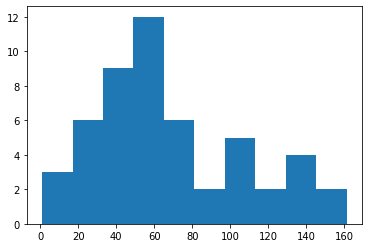

In [9]:
plt.hist(agencies_per_pop)

In [10]:
gmaps.configure(api_key=g_key)

In [11]:
locations = state_report_complete[["Lat", "Lng"]].astype(float)
report_rate = state_report_complete['Report Rate'].astype(float)
pop_covered = state_report_complete['Agencies Per Pop'].astype(float)

#agencies per pop heatmap
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=pop_covered, 
                                 dissipating=False, max_intensity=170,
                                 point_radius = 2)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
incidents_reported_ratio.describe()

count     51.000000
mean      26.629300
std       43.036692
min        0.000000
25%        9.277852
50%       16.340011
75%       26.986008
max      303.222270
dtype: float64

(array([41.,  6.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.        ,  30.32222705,  60.64445409,  90.96668114,
        121.28890819, 151.61113523, 181.93336228, 212.25558933,
        242.57781637, 272.90004342, 303.22227047]),
 <a list of 10 Patch objects>)

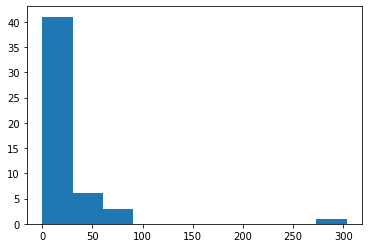

In [13]:

plt.hist(incidents_reported_ratio)

In [14]:
#incidents reported ratio heat map
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=report_rate, 
                                 dissipating=False, max_intensity=25,
                                 point_radius = 1.5)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
state_report_complete.head()

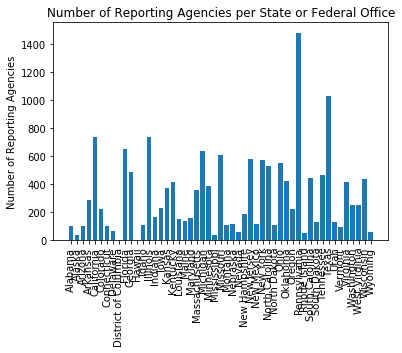

In [25]:
plt.bar(state_report_complete['Participating state/Federal'],state_report_complete['Number of participating agencies'] )
plt.xticks(state_report_complete['Participating state/Federal'], rotation=90)
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Number of Reporting Agencies per State or Federal Office')
plt.ylabel('Number of Reporting Agencies')
plt.show()

In [15]:
percent_pop = pd.read_csv('PercentPopulation.csv')

In [24]:
percent_pop

,Unnamed: 0,State,PerPop
0,23,Mississippi,1.653527
1,9,Georgia,5.349316
2,47,West Virginia,9.582331
3,14,Iowa,9.792788
4,17,Louisiana,9.980903
5,39,South Carolina,10.145331
6,2,Arkansas,11.445993
7,19,Maryland,12.542669
8,18,Maine,12.839686
9,28,New Hampshire,14.873528


In [21]:
state_report_complete['State'] = state_report_complete['Participating state/Federal']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
state_report_complete.head()

,Participating state/Federal,Lat,Lng,Number of participating agencies,Population covered,Agencies submitting incident reports,Total number of incidents reported,Report Rate,Agencies Per Pop,State
0,Alabama,32.3182,-86.9023,98,1865517,0,0,0.000000,52.532354,Alabama
1,Alaska,64.2008,-149.494,32,733747,4,7,9.540073,43.611763,Alaska
2,Arizona,34.0489,-111.094,102,7135285,19,166,23.264663,14.295154,Arizona
3,Arkansas,35.2011,-91.8318,286,2874960,9,13,4.521802,99.479645,Arkansas
4,California,36.7783,-119.418,736,39520441,220,1063,26.897473,18.623274,California


In [26]:
state_report_complete = pd.merge(state_report_complete, percent_pop, how= 'left', on = ['State' , 'State'])

In [29]:
#shows 
locations = state_report_complete[["Lat", "Lng"]].astype(float)
perpop = state_report_complete['PerPop']
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=perpop, 
                                 dissipating=False, max_intensity=75,
                                 point_radius = 1.5)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))